# 3. Find similar wines!

In [1]:
import pandas as pd
import matplotlib
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

We load the dataset and we normalize the parameters. Normalization ensures that good quality clusters are generated which can improve the efficiency of clustering algorithms.So it becomes an essential step before clustering as Euclidean distance is very sensitive to the changes in the differences. 

In [2]:
wine=pd.read_csv('wine.data')

wine.columns = ['class_identifier', 'Alcohol', 'Malic_acid', 'Ash', 
              'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 
              'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 
              'Color_intensity', 'Hue', 'OD280/OD315_of_diluted wines', 'Proline']


df_unlabelled = wine.copy()

scaled_df_unlabelled = scale(df_unlabelled)

scaled_df_unlabelled_df = pd.DataFrame(scaled_df_unlabelled)
scaled_df_unlabelled_df.columns = ['class_identifier', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 
        'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 
        'Color_intensity', 'Hue', 'OD280/OD315_of_diluted wines', 'Proline']

standardized_wine=scaled_df_unlabelled_df
standardized_wine.head()

,class_identifier,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted wines,Proline
0,-1.222468,0.255824,-0.501624,-0.824485,-2.500110,0.029180,0.572666,0.739636,-0.823139,-0.538575,-0.291130,0.407100,1.131698,0.971052
1,-1.222468,0.206229,0.018020,1.107690,-0.275639,0.099932,0.812784,1.221645,-0.501337,2.145975,0.269729,0.319567,0.804579,1.400998
2,-1.222468,1.706501,-0.349315,0.487935,-0.816726,0.948953,2.493609,1.472691,-0.984039,1.040572,1.184362,-0.424458,1.202811,2.340509
3,-1.222468,0.305420,0.224086,1.836812,0.445811,1.302712,0.812784,0.669343,0.222716,0.408913,-0.317016,0.363334,0.463238,-0.032154
4,-1.222468,1.495719,-0.519543,0.305655,-1.297693,0.878201,1.565153,1.372273,-0.179536,0.672104,0.731360,0.407100,0.349457,2.244965


K-Means is implicitly based on pairwise Euclidean distances b/w data points, because the sum of squared deviations from centroid is equal to the sum of pairwise squared Euclidean distances divided by the number of points. K-means is appropriate to use in combination with the Euclidean distance because the main objective of k-means is to minimize the sum of within-cluster variances, and the within-cluster variance is calculated in exactly the same way as the sum of Euclidean distances between all points in the cluster to the cluster centroid. As other answers point out, the algorithm is only guaranteed to converge (even if to a local minimum) if both the centroid update step and the data points reassignment step are done in the same n-dimensional Euclidean space. Also, the mean is the best estimator to be used when one needs to minimize total variance.

$$|\vec{d}|=\sqrt{(x{1}^2-x{0}^2) + (y{1}^2-y{0}^2)}$$(1)


To calculate Euclidean distance with NumPy we can use numpy.linalg.norm:

In [3]:
def euclidean_distance(x, y):
    return np.linalg.norm(x - y)


### K-means algorithm is based on the following steps: 

1. Randomly initialize the cluster centers of each cluster from the data points. 


2. Finding the distance between each of the datapoints with each of the centroids. 


3. Re-calculating the centroids, we find the new values for centroid.


4. Stop the algorithm when the difference between the old and the new centroids is negligible.

In [4]:
def get_rand_centroids(min_lst,max_lst,n):
    centroids=np.zeros((n,len(min_lst)))
    for i in range(n):
        for j in range(len(min_lst)):
            max_=max_lst[j]
            min_=min_lst[j]
            rand=random.uniform(min_,max_)
            #print(i,j)
            centroids[i][j]=rand
    return centroids


In [5]:
def get_clusters(centroids, data, n):
    clusters= np.zeros(len(data))
    for i in range(len(data)):
        min_dis=10000
        for j in range(len(centroids)):
            distance = euclidean_distance(data[i], centroids[j])
            if distance < min_dis: 
                min_dis = distance
                clusters[i]= j
        min_dis=10000
    
    new_centroids = get_centroids(clusters, data, n)
    
    
    return clusters,new_centroids

In [6]:
def get_centroids(clusters, data, n):
    centroids=np.zeros((n,len(data[0])))
    for i in range(n):
        cluster_points = np.where(clusters == i)
        centroids[i]= data[cluster_points].mean(0)
    return centroids

In [7]:
def kmeans(num, dataset):
    centroids = []
    
    for item in np.random.randint(instances-1, size=num):
        centroids.append(dataset[item])
    #print(centroids)
    
    dictionary = {}
    for i in range(num):
        dictionary[i] = []
        dictionary[i].append(centroids[i])
    #print(dict)
    
    changed = {}
    while(dictionary != changed):
        changed = dictionary
        for item in dataset:
            distance = []
            for center in centroids:
                #print(item[i])
                distance.append(calcDistance(item, center))
            cluster = distance.index(min(distance))
            dictionary[cluster].append(item)
            
        centroids = []
        
        for item in dictionary:
            centroids.append(calcCentroids(dictionary[item]))
    print(dictionary)

In [8]:
def kmeans_model(data,n):
    max_lst= np.array([data[:,i].max() for i in range(len(data[0])) ])
    min_lst= np.array([data[:,i].min() for i in range(len(data[0])) ])
    centroids= get_rand_centroids(min_lst,max_lst,n)
    clusters= np.zeros(len(data))

    new_clusters, new_centroids= get_clusters(centroids, data, n)

    while not np.array_equal(new_clusters,clusters):
        clusters, centroids=new_clusters, new_centroids
        new_clusters, new_centroids= get_clusters(centroids, data, n)

    return clusters

In [16]:
clusters={}
for i in range(3):
    clusters[i]=np.where(k == i)

In [17]:
k=kmeans_model(standardized_wine.values,3)
clusters




{0: (array([ 58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
          71,  73,  74,  75,  76,  77,  78,  79,  80,  81,  83,  84,  85,
          86,  87,  88,  89,  90,  91,  92,  93,  95,  96,  97,  98,  99,
         100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
         113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126,
         127, 128], dtype=int64),),
 1: (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
          26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
          39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
          52,  53,  54,  55,  56,  57,  72,  94, 120], dtype=int64),),
 2: (array([ 82, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
         141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 1

Now we can visualize the composition of the three clusters:

Now we will use the code that we have implemented taking all the features of the dataset: 

### Overview 

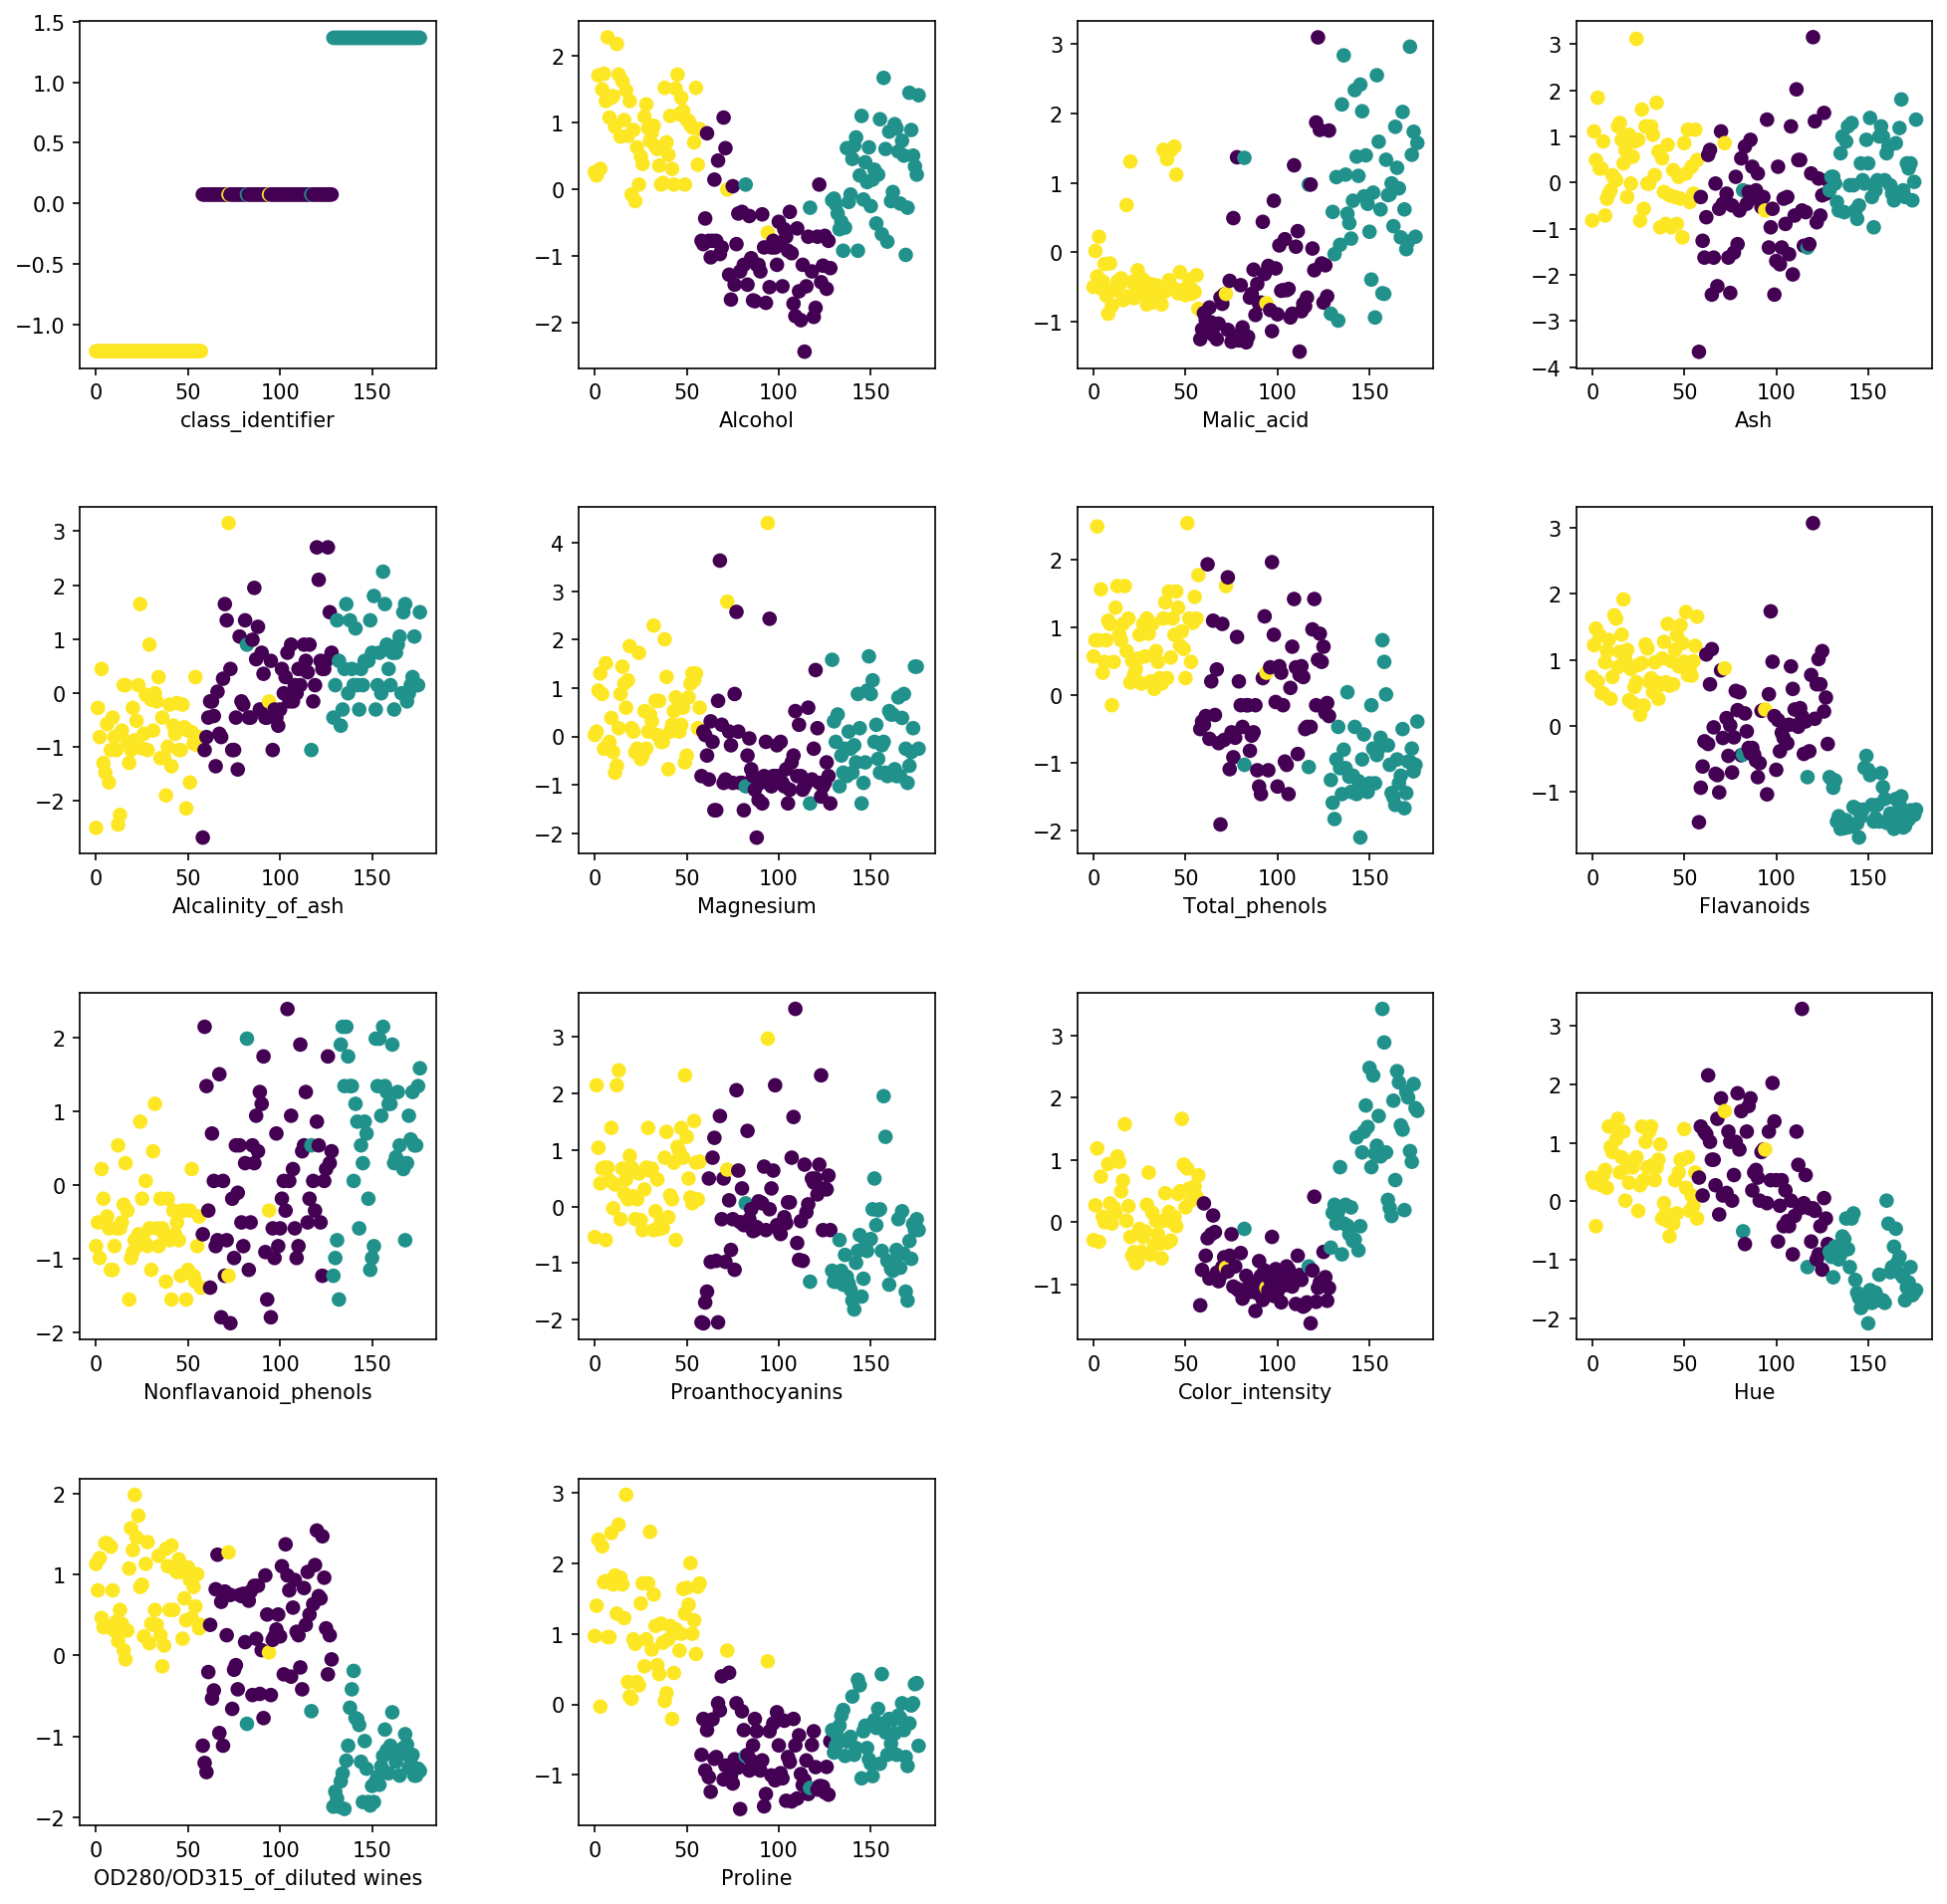

In [139]:
fig = plt.figure(figsize=(16, 16), dpi=150)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
x=1
for i in standardized_wine:
    ax = fig.add_subplot(4, 4, x)
    ax.scatter(range(len(standardized_wine)), standardized_wine[i], c=k)
    ax.set_xlabel(i)
    x+=1

### Alcohol 

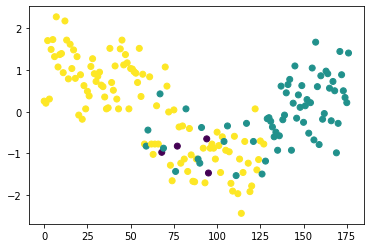

In [116]:
plt.scatter(range(len(standardized_wine)), standardized_wine.Alcohol, c=k)


### Alcalinity of ash
              

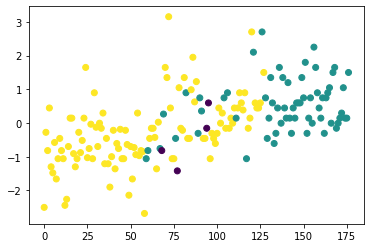

In [126]:
plt.scatter(range(len(standardized_wine)), standardized_wine.Alcalinity_of_ash, c=k)

### Color intensity

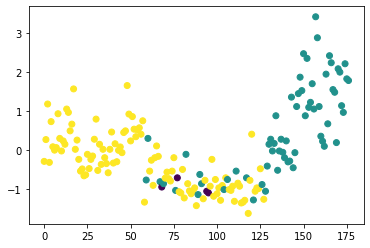

In [129]:
plt.scatter(range(len(standardized_wine)), standardized_wine.Color_intensity, c=k)

### Hue

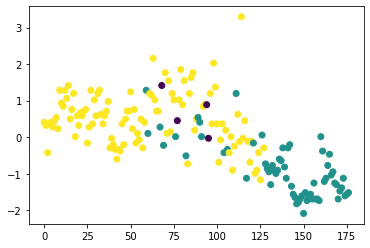

In [128]:
plt.scatter(range(len(standardized_wine)), standardized_wine.Hue, c=k)

### Proline

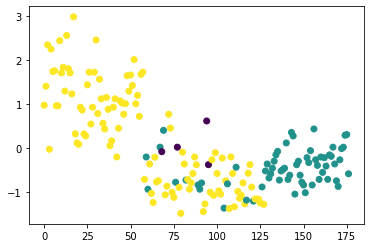

In [124]:
plt.scatter(range(len(standardized_wine)), standardized_wine.Proline, c=k)

### Proanthocyanins

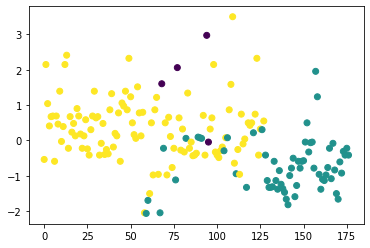

In [123]:
plt.scatter(range(len(standardized_wine)), standardized_wine.Proanthocyanins, c=k)

### Nonflavanoid phenols

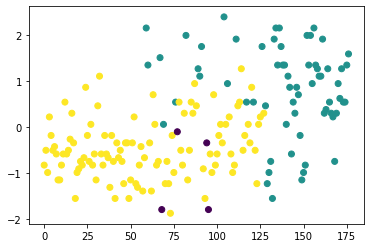

In [122]:
plt.scatter(range(len(standardized_wine)), standardized_wine.Nonflavanoid_phenols, c=k)

### Flavanoids

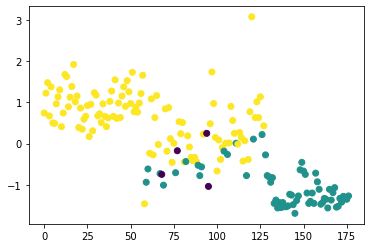

In [121]:
plt.scatter(range(len(standardized_wine)), standardized_wine.Flavanoids, c=k)

### Magnesium

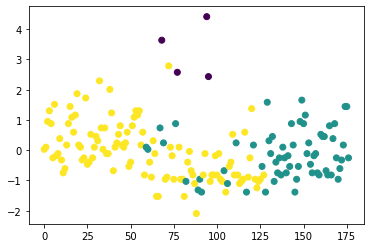

In [118]:
plt.scatter(range(len(standardized_wine)), standardized_wine.Magnesium, c=k)

### Total phenols

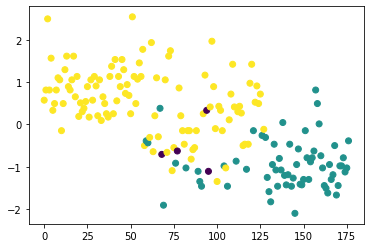

In [120]:
plt.scatter(range(len(standardized_wine)), standardized_wine.Total_phenols, c=k)

### Malic acid

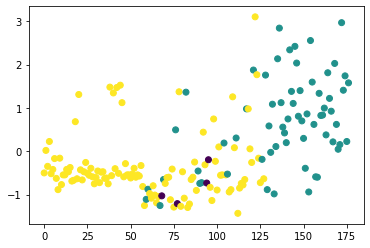

In [119]:
plt.scatter(range(len(standardized_wine)), standardized_wine.Malic_acid, c=k)

### Ash

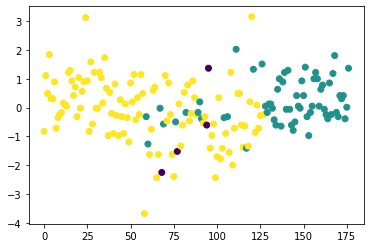

In [117]:
plt.scatter(range(len(standardized_wine)), standardized_wine.Ash, c=k)

Observing the plots of the different features we can say that the clusters are not very similar between them. 
K-means begins with a random choice of centroids and therefore can produce different grouping results on different sequences of the algorithm. Therefore, the results may not be repeatable.

###  Measuring Feature Relevance




In [25]:
from sklearn.decomposition import PCA
new_dataframe= standardized_wine.drop('class_identifier', axis=1)
pca = PCA(n_components=13)
pca.fit(new_dataframe)
x_pca = pca.transform(new_dataframe)

Feature ranking:
1 feature Alcohol 0.3414858520842286
2 feature Malic_acid 0.30540803001362227
3 feature Magnesium 0.04946100764556341
4 feature Ash 0.03650446946724594
5 feature Total_phenols 0.0361051388116307
6 feature Flavanoids 0.035174001343827435
7 feature Color_intensity 0.03503287985800956
8 feature Proline 0.033604752541531224
9 feature Proanthocyanins 0.031127014550790862
10 feature OD280/OD315_of_diluted wines 0.029417174545118812
11 feature Alcalinity_of_ash 0.023659363301451637
12 feature Nonflavanoid_phenols 0.021863964186041467
13 feature Hue 0.021156351650938127


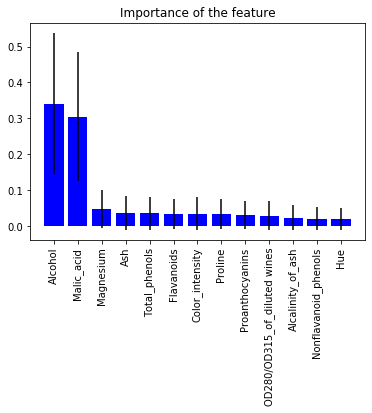

In [26]:
X=x_pca
Y=wine['class_identifier']

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=700)
rfc.fit(X_train,Y_train)
rfc_pred1=rfc.predict(X_test)

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")




for j in range(new_dataframe.shape[1]):
    #print("%d. feature %d (%f)" % (j + 1, list(new_dataframe.columns)[indices[j]], importances[indices[j]]))
    print( str(j + 1)+" feature " + list(new_dataframe.columns)[indices[j]]+" "+ str(importances[indices[j]]))



plt.figure()
plt.title("Importance of the feature")
plt.bar(range(X.shape[1]), importances[indices],
       color="blue", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [list(new_dataframe.columns)[i] for i in indices])
plt.xticks(rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
#print([list(new_dataframe.columns)[i] for i in indices])
